In [26]:
# input: manual-periodogram
# output: ebai-estimates

import phoebe
from phoebe import u, c

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16, 6)

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[2].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
importlib.reload(gen_utils)

logger = phoebe.logger(clevel='WARNING')

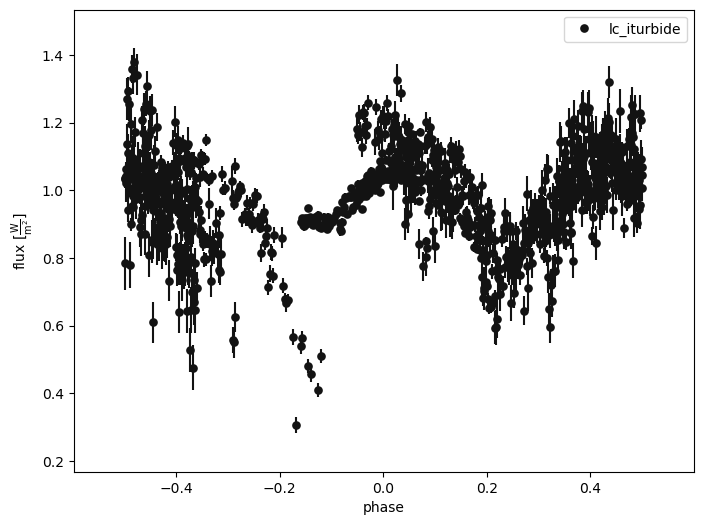

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [27]:
b = phoebe.load("./bundle-saves/manual-periodogram")
b.plot(x='phase', dataset='lc_iturbide', show=True, legend=True, marker='.')

In [28]:
gaiaDatasets = [d for d in b.datasets if 'gaia' in d and 'raw' not in d]
rawGaiaDatasets = [d for d in b.datasets if 'gaia' in d and 'raw' in d]
gaiaDatasets, rawGaiaDatasets

(['lc_gaia_g', 'lc_gaia_rp', 'lc_gaia_bp'],
 ['lc_gaia_g_raw', 'lc_gaia_rp_raw', 'lc_gaia_bp_raw'])

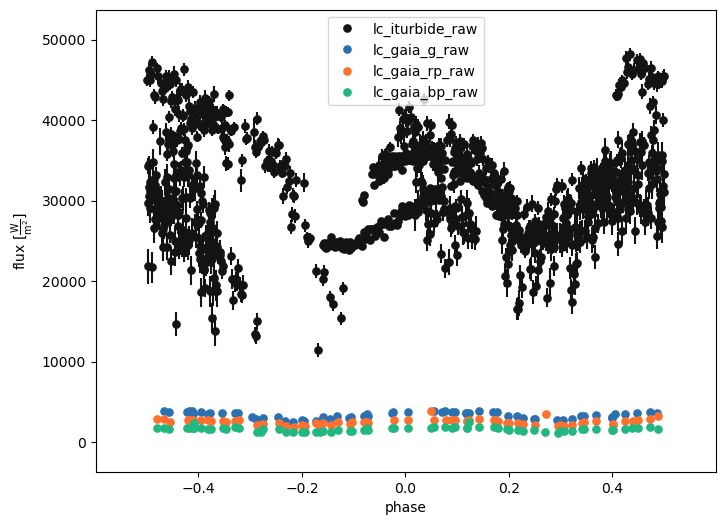

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [29]:
b.plot(x='phase', dataset=['lc_iturbide_raw'] + rawGaiaDatasets, show=True, legend=True, marker='.')

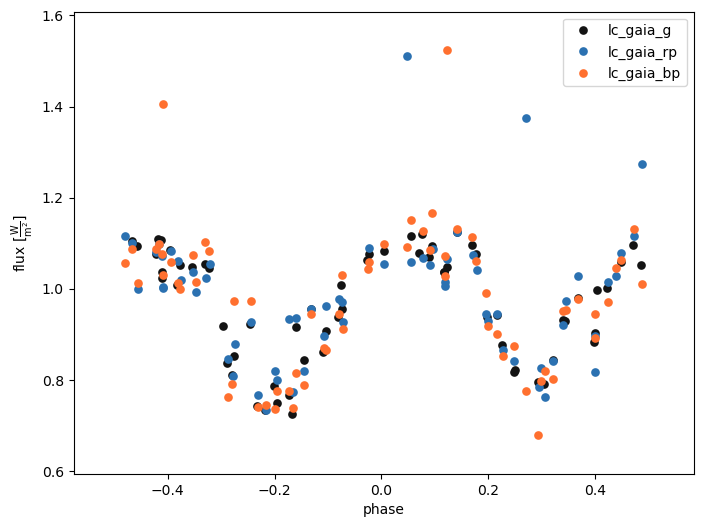

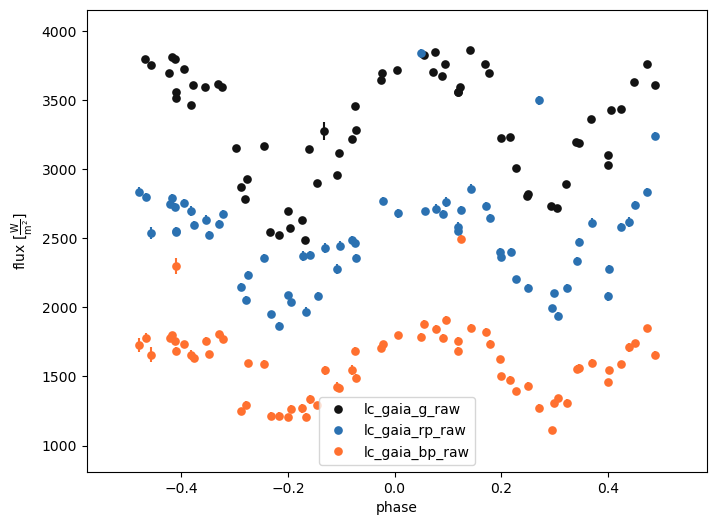

(<autofig.figure.Figure | 1 axes | 3 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [30]:
b.plot(x='phase', dataset=gaiaDatasets, show=True, legend=True, marker='.')
b.plot(x='phase', dataset=rawGaiaDatasets, show=True, legend=True, marker='.')

### Default forward models

In [31]:
# EBAI KNN values all seem to affect relative values
    # setting to dataset-scaled to see if at least general shape of model is correct
    # might also help with getting a good trend out of residuals when adopting estimator solutions
b.set_value_all(qualifier='pblum_mode', value='dataset-scaled')

# will probably use this strategy when optimizing; will try to optimize for pblum
# for d in b.datasets:
#     if "raw" in d:
#         b.set_value(qualifier='pblum_mode', dataset=d, value='absolute')
# print(b['pblum_mode'])

In [32]:
distance = 1000 / 0.38051966554433253 # GDR3 parallax, in mas (1000)

b.set_value(qualifier='distance', value=distance*u.pc)
print(distance, "pc")
print(b['distance'])

2627.985070284087 pc
Parameter: distance@system
                       Qualifier: distance
                     Description: Distance to the system
                           Value: 8.109114615869624e+19 m
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [33]:
print(b['pblum'])

ParameterSet: 0 parameters
NO PARAMETERS


100%|██████████| 1284/1284 [01:24<00:00, 15.21it/s]
Tue, 15 Aug 2023 14:31 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 14:31 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 14:31 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


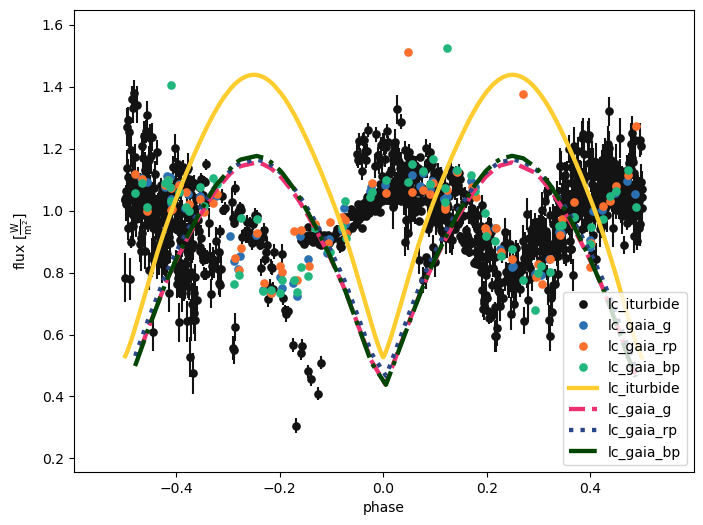

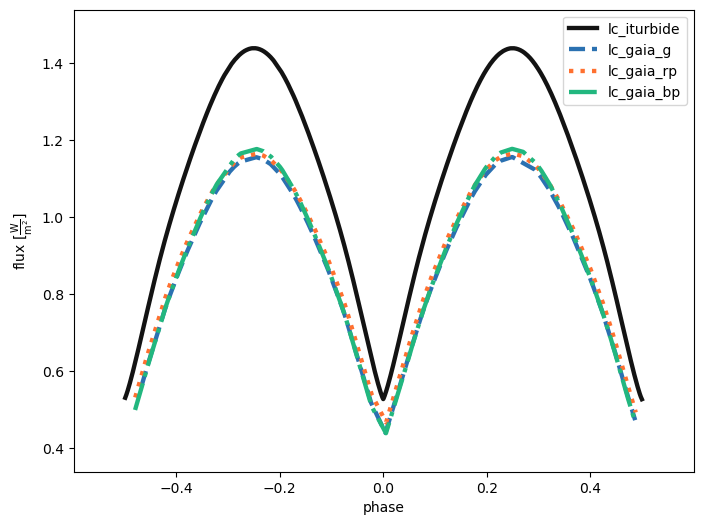

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [34]:
# run and show default forward model
# gen_utils.avoidAtmosphereErrors(b)
# b.run_compute(compute='fast_compute', model='fast_default')

gen_utils.abilitateDatasets(b, ['lc_iturbide'] + gaiaDatasets)

gen_utils.resetAtmosphere(b)
b.run_compute(compute='phoebe01', model='full_default', overwrite=True)

b.plot(x='phase', dataset=['lc_iturbide'] + gaiaDatasets, model='full_default', show=True, legend=True, marker={'dataset': '.'})
b.plot(['model'], x='phase', dataset=['lc_iturbide'] + gaiaDatasets, model='full_default', show=True, legend=True, marker={'dataset': '.'})

100%|██████████| 1284/1284 [01:27<00:00, 14.71it/s]


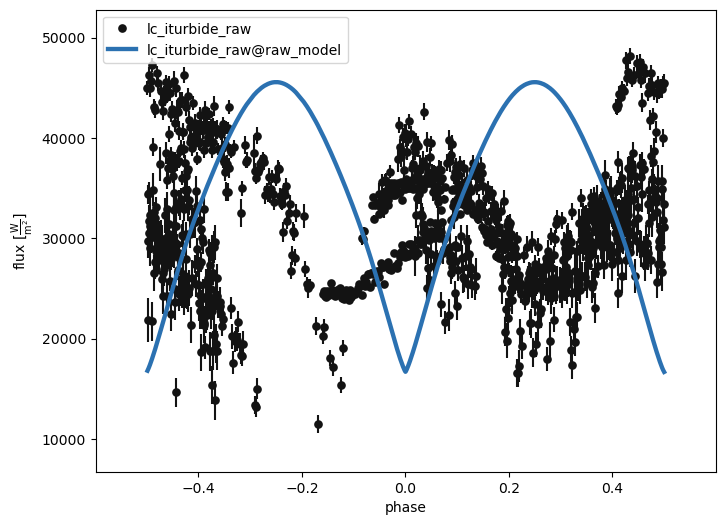

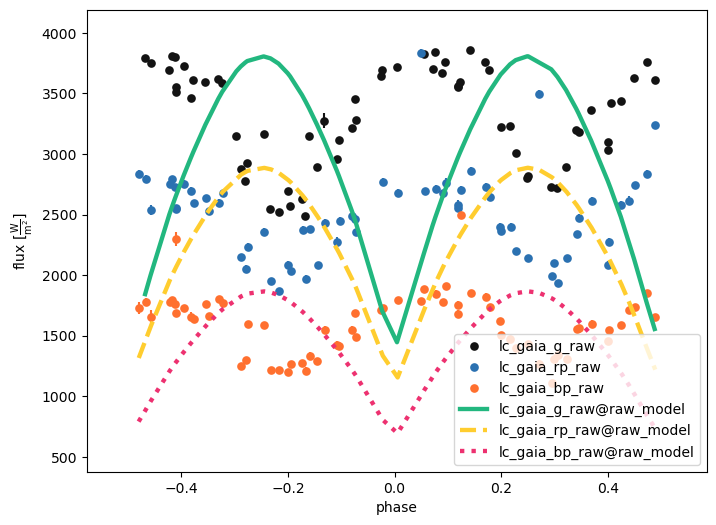

(<autofig.figure.Figure | 1 axes | 6 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [36]:
allRawDatasets = ['lc_iturbide_raw'] + rawGaiaDatasets
gen_utils.abilitateDatasets(b, allRawDatasets)

b.run_compute(compute='phoebe01', model='raw_model', overwrite=True)
b.plot(x='phase', dataset='lc_iturbide_raw', kind='lc', show=True, legend=True, marker={'dataset': '.'})
b.plot(x='phase', dataset=rawGaiaDatasets, kind='lc', show=True, legend=True, marker={'dataset': '.'})

## EBAI KNN estimator runs

In [37]:
# ignore sklearn warnings; caused by PHOEBE internals
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Normalized datasets

In [38]:
b.add_solver('estimator.ebai', ebai_method='knn', phase_bin=False, solver='ebai_knn', lc_datasets=['lc_iturbide'] + gaiaDatasets, overwrite=True)
print(b['ebai_knn'])

b.run_solver(solver='ebai_knn', solution='ebai_knn_solution', overwrite=True)
gen_utils.printFittedVals(b, 'ebai_knn_solution')
print()
gen_utils.printFittedTwigsConstraints(b, 'ebai_knn_solution', {'incl@binary@orbit@component': u.rad})

ParameterSet: 7 parameters
         comments@ebai_knn@solver: 
       use_server@ebai_knn@solver: none
      lc_datasets@ebai_knn@solver: ['lc_iturbide', 'lc_gaia_g', 'lc_gaia_rp', 'lc_gaia_bp']
       lc_combine@ebai_knn@solver: median
        phase_bin@ebai_knn@solver: False
      ebai_method@ebai_knn@solver: knn
            orbit@ebai_knn@solver: binary
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.47 rad
fillout_factor@contact_envelope@envelope@component = 0.77 
q@binary@orbit@component = 9.51 

  t0_supconj@binary@orbit@component 0.0 d
C teffratio@binary@orbit@component 1.0
  incl@binary@orbit@component 1.5707963267948966 rad
C fillout_factor@contact_envelope@envelope@component 0.6417897080770951
  q@binary@orbit@component 1.0


In [39]:
normalizedDatasets = ['lc_iturbide'] + gaiaDatasets
for d in normalizedDatasets:
	print(f"\nf'ebai_knn_{d}_solution'\n----------------------------------")
	b.add_solver('estimator.ebai', ebai_method='knn', phase_bin=False, solver=f'ebai_knn_{d}', lc_datasets=[d], overwrite=True)
	b.run_solver(solver=f'ebai_knn_{d}', solution=f'ebai_knn_{d}_solution', overwrite=True)
	gen_utils.printFittedVals(b, f'ebai_knn_{d}_solution')


f'ebai_knn_lc_iturbide_solution'
----------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.87 
incl@binary@orbit@component = 0.92 rad
fillout_factor@contact_envelope@envelope@component = 0.62 
q@binary@orbit@component = 0.89 

f'ebai_knn_lc_gaia_g_solution'
----------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.43 rad
fillout_factor@contact_envelope@envelope@component = 0.42 
q@binary@orbit@component = 9.74 

f'ebai_knn_lc_gaia_rp_solution'
----------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.81 
incl@binary@orbit@component = 0.99 rad
fillout_factor@contact_envelope@envelope@component = 0.78 
q@binary@orbit@component = 4.24 

f'ebai_knn_lc_gaia_bp_solution'
----------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0

In [40]:
# all normalized Gaia datasets
b.add_solver('estimator.ebai', ebai_method='knn', phase_bin=False, solver='ebai_knn_gaia', lc_datasets=gaiaDatasets, overwrite=True)
b.run_solver(solver='ebai_knn_gaia', solution='ebai_knn_gaia_solution', overwrite=True)
gen_utils.printFittedVals(b, 'ebai_knn_gaia_solution')

t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.85 
incl@binary@orbit@component = 1.01 rad
fillout_factor@contact_envelope@envelope@component = 0.76 
q@binary@orbit@component = 2.15 


### Raw datasets

In [41]:
for d in allRawDatasets:
	print(f"\nf'ebai_knn_{d}_solution'\n----------------------------------")
	b.add_solver('estimator.ebai', ebai_method='knn', phase_bin=False, solver=f'ebai_knn_{d}', lc_datasets=[d], overwrite=True)
	try:
		b.run_solver(solver=f'ebai_knn_{d}', solution=f'ebai_knn_{d}_solution', overwrite=True)
	except:
		print(f"Couldn't generate an estimator result using {d}")
		continue
	gen_utils.printFittedVals(b, f'ebai_knn_{d}_solution')


f'ebai_knn_lc_iturbide_raw_solution'
----------------------------------
2G model CG12E1 failed with error: Optimal parameters not found: The maximum number of function evaluations is exceeded.
2G model CG12E2 failed with error: Optimal parameters not found: The maximum number of function evaluations is exceeded.
Couldn't generate an estimator result using lc_iturbide_raw

f'ebai_knn_lc_gaia_g_raw_solution'
----------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.93 
incl@binary@orbit@component = 1.47 rad
fillout_factor@contact_envelope@envelope@component = 0.46 
q@binary@orbit@component = 7.74 

f'ebai_knn_lc_gaia_rp_raw_solution'
----------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.83 
incl@binary@orbit@component = 1.03 rad
fillout_factor@contact_envelope@envelope@component = 0.77 
q@binary@orbit@component = 3.71 

f'ebai_knn_lc_gaia_bp_raw_solution'
-------------

In [42]:
# all raw datasets
b.add_solver('estimator.ebai', ebai_method='knn', phase_bin=False, solver='ebai_knn_raw', lc_datasets=allRawDatasets, overwrite=True)
b.run_solver(solver='ebai_knn_raw', solution='ebai_knn_raw_solution', overwrite=True)
gen_utils.printFittedVals(b, 'ebai_knn_raw_solution')

t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.89 
incl@binary@orbit@component = 1.49 rad
fillout_factor@contact_envelope@envelope@component = 0.77 
q@binary@orbit@component = 9.72 


In [45]:
# raw Gaia datasets
b.add_solver('estimator.ebai', ebai_method='knn', phase_bin=False, solver='ebai_knn_raw_gaia', lc_datasets=rawGaiaDatasets, overwrite=True)
b.run_solver(solver='ebai_knn_raw_gaia', solution='ebai_knn_raw_gaia_solution', overwrite=True)
gen_utils.printFittedVals(b, 'ebai_knn_raw_gaia_solution')

t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.46 rad
fillout_factor@contact_envelope@envelope@component = 0.56 
q@binary@orbit@component = 9.42 


In [46]:
gen_utils.printFittedTwigsConstraints(b, 'ebai_knn_solution', {'incl@binary@orbit@component': u.rad})

  t0_supconj@binary@orbit@component 0.0 d
C teffratio@binary@orbit@component 1.0
  incl@binary@orbit@component 1.5707963267948966 rad
C fillout_factor@contact_envelope@envelope@component 0.6417897080770951
  q@binary@orbit@component 1.0


In [47]:
print(b['teffratio'])
print(b['fillout_factor'])
print(b['teff'])

ParameterSet: 2 parameters
C      teffratio@binary@component: 1.0
             teffratio@constraint: {teff@secondary@component} / {teff@primary@component}
ParameterSet: 2 parameters
C  fillout_factor@contact_enve...: 0.6417897080770951
        fillout_factor@constraint: pot_to_fillout_factor({q@binary@component}, {pot@contact_envelope@component})
ParameterSet: 2 parameters
           teff@primary@component: 6000.0 K
         teff@secondary@component: 6000.0 K


In [48]:
b.flip_constraint('teffratio', solve_for='teff@secondary')
b.flip_constraint('pot@contact_envelope', solve_for='requiv@primary')
b.flip_constraint('fillout_factor', solve_for='pot@contact_envelope')

<ConstraintParameter: {pot@contact_envelope@component} = fillout_factor_to_pot({q@binary@component}, {fillout_factor@contact_envelope@component}) (solar units) => 3.4013774072298766>

## Testing fit of each solution

### Temporary back up
Storing the original bundle results in memory, in case need to revert arises

In [49]:
backupBundle = b.copy()

In [ ]:
b = backupBundle.copy()

In [66]:
b.solutions, b.solvers

(['lcperiod_iturbide_auto_solution',
  'lcperiod_iturbide_manual_solution',
  'ebai_knn_solution',
  'ebai_knn_lc_iturbide_solution',
  'ebai_knn_lc_gaia_g_solution',
  'ebai_knn_lc_gaia_rp_solution',
  'ebai_knn_lc_gaia_bp_solution',
  'ebai_knn_gaia_solution',
  'ebai_knn_lc_gaia_g_raw_solution',
  'ebai_knn_lc_gaia_rp_raw_solution',
  'ebai_knn_lc_gaia_bp_raw_solution',
  'ebai_knn_raw_solution',
  'ebai_knn_raw_gaia_solution'],
 ['lcperiod_iturbide_auto',
  'lcperiod_iturbide_manual',
  'ebai_knn',
  'ebai_knn_lc_iturbide',
  'ebai_knn_lc_gaia_g',
  'ebai_knn_lc_gaia_rp',
  'ebai_knn_lc_gaia_bp',
  'ebai_knn_gaia',
  'ebai_knn_lc_iturbide_raw',
  'ebai_knn_lc_gaia_g_raw',
  'ebai_knn_lc_gaia_rp_raw',
  'ebai_knn_lc_gaia_bp_raw',
  'ebai_knn_raw',
  'ebai_knn_raw_gaia'])

### Checking solution goodness of fit

In [52]:
# gen_utils.abilitateDatasets(b, normalizedDatasets + allRawDatasets)
b.set_value_all(qualifier='enabled', value=True)
print(b['enabled'])

ParameterSet: 18 parameters
   enabled@mesh01@phoebe01@com...: True
   enabled@mesh01@fast_compute...: True
   enabled@lc_iturbide@phoebe0...: True
   enabled@lc_iturbide@fast_co...: True
   enabled@lc_iturbide_raw@pho...: True
   enabled@lc_iturbide_raw@fas...: True
   enabled@lc_gaia_g@phoebe01@...: True
   enabled@lc_gaia_g@fast_comp...: True
   enabled@lc_gaia_rp@phoebe01...: True
   enabled@lc_gaia_rp@fast_com...: True
   enabled@lc_gaia_bp@phoebe01...: True
   enabled@lc_gaia_bp@fast_com...: True
   enabled@lc_gaia_g_raw@phoeb...: True
   enabled@lc_gaia_g_raw@fast_...: True
   enabled@lc_gaia_rp_raw@phoe...: True
   enabled@lc_gaia_rp_raw@fast...: True
   enabled@lc_gaia_bp_raw@phoe...: True
   enabled@lc_gaia_bp_raw@fast...: True


ebai_knn_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.47 rad
fillout_factor@contact_envelope@envelope@component = 0.77 
q@binary@orbit@component = 9.51 


100%|██████████| 1284/1284 [01:05<00:00, 19.47it/s]
Tue, 15 Aug 2023 15:14 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:14 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:14 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide 2.543780295067066 W / m2
	 lc_iturbide_raw 490328.2083064464 W / m2
	 lc_gaia_g 0.21866393776969317 W / m2
	 lc_gaia_rp 0.23152731033801488 W / m2
	 lc_gaia_bp 0.13736415277884306 W / m2
	 lc_gaia_g_raw 1126.5167513209303 W / m2
	 lc_gaia_rp_raw 1490.4314673653148 W / m2
	 lc_gaia_bp_raw 795.4353658269488 W / m2


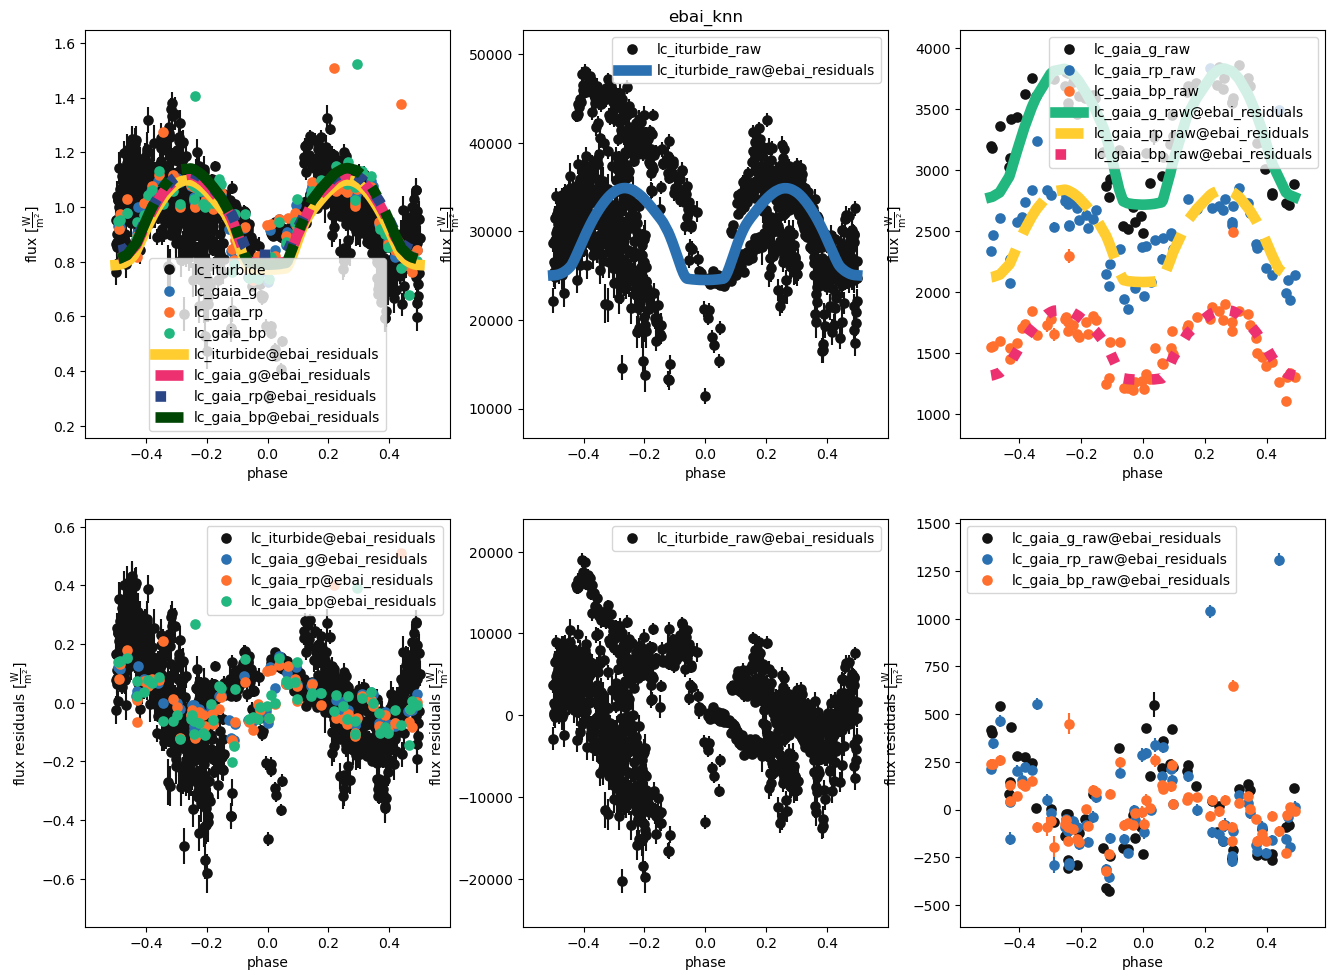

ebai_knn_lc_iturbide_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.87 
incl@binary@orbit@component = 0.92 rad
fillout_factor@contact_envelope@envelope@component = 0.62 
q@binary@orbit@component = 0.89 


100%|██████████| 1284/1284 [01:36<00:00, 13.30it/s]
Tue, 15 Aug 2023 15:15 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:15 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:15 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide -7.435641736276604 W / m2
	 lc_iturbide_raw 244134.9118195197 W / m2
	 lc_gaia_g 0.010601834549684552 W / m2
	 lc_gaia_rp 0.048659887966442605 W / m2
	 lc_gaia_bp -0.10468053851732984 W / m2
	 lc_gaia_g_raw 1487.088667982663 W / m2
	 lc_gaia_rp_raw 1232.4193000783134 W / m2
	 lc_gaia_bp_raw 629.4214132681609 W / m2


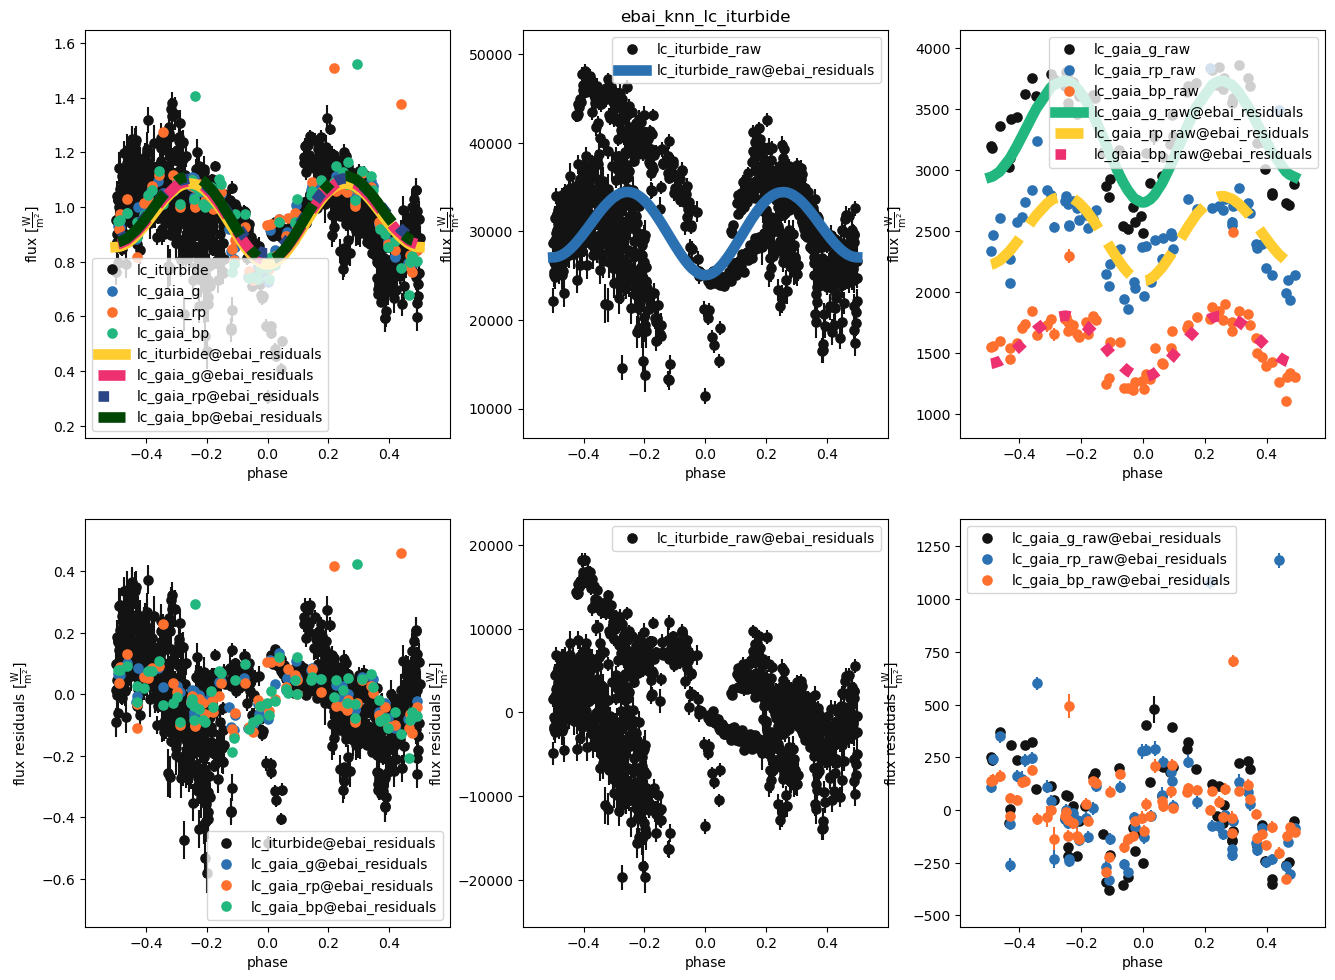

ebai_knn_lc_gaia_g_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.43 rad
fillout_factor@contact_envelope@envelope@component = 0.42 
q@binary@orbit@component = 9.74 


100%|██████████| 1284/1284 [01:05<00:00, 19.69it/s]
Tue, 15 Aug 2023 15:17 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:17 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:17 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide -2.3213100659196577 W / m2
	 lc_iturbide_raw 364057.4743748917 W / m2
	 lc_gaia_g 0.10250969634635543 W / m2
	 lc_gaia_rp 0.12901446689630214 W / m2
	 lc_gaia_bp 0.007555458605798093 W / m2
	 lc_gaia_g_raw 1457.7724696754426 W / m2
	 lc_gaia_rp_raw 1377.4262424213107 W / m2
	 lc_gaia_bp_raw 752.4798967321703 W / m2


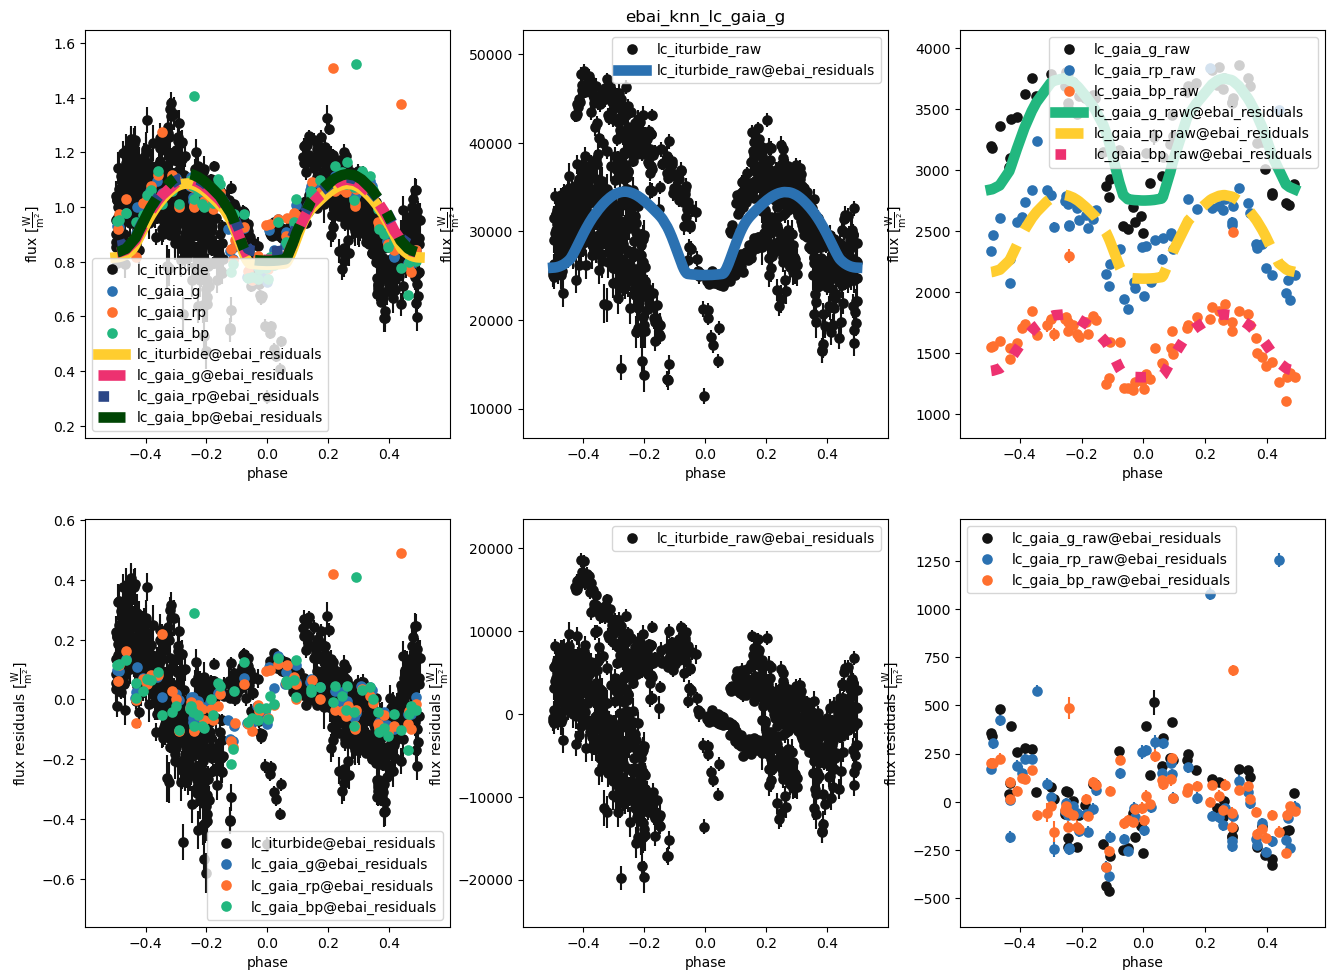

ebai_knn_lc_gaia_rp_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.81 
incl@binary@orbit@component = 0.99 rad
fillout_factor@contact_envelope@envelope@component = 0.78 
q@binary@orbit@component = 4.24 


100%|██████████| 1284/1284 [01:20<00:00, 16.05it/s]
Tue, 15 Aug 2023 15:18 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:18 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:18 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide 6.740236099442537 W / m2
	 lc_iturbide_raw 904767.8523094929 W / m2
	 lc_gaia_g -0.01144898596648447 W / m2
	 lc_gaia_rp -0.01261084267287238 W / m2
	 lc_gaia_bp -0.042105997935591444 W / m2
	 lc_gaia_g_raw 1766.128101916608 W / m2
	 lc_gaia_rp_raw 764.0845514599666 W / m2
	 lc_gaia_bp_raw 450.10144433258324 W / m2


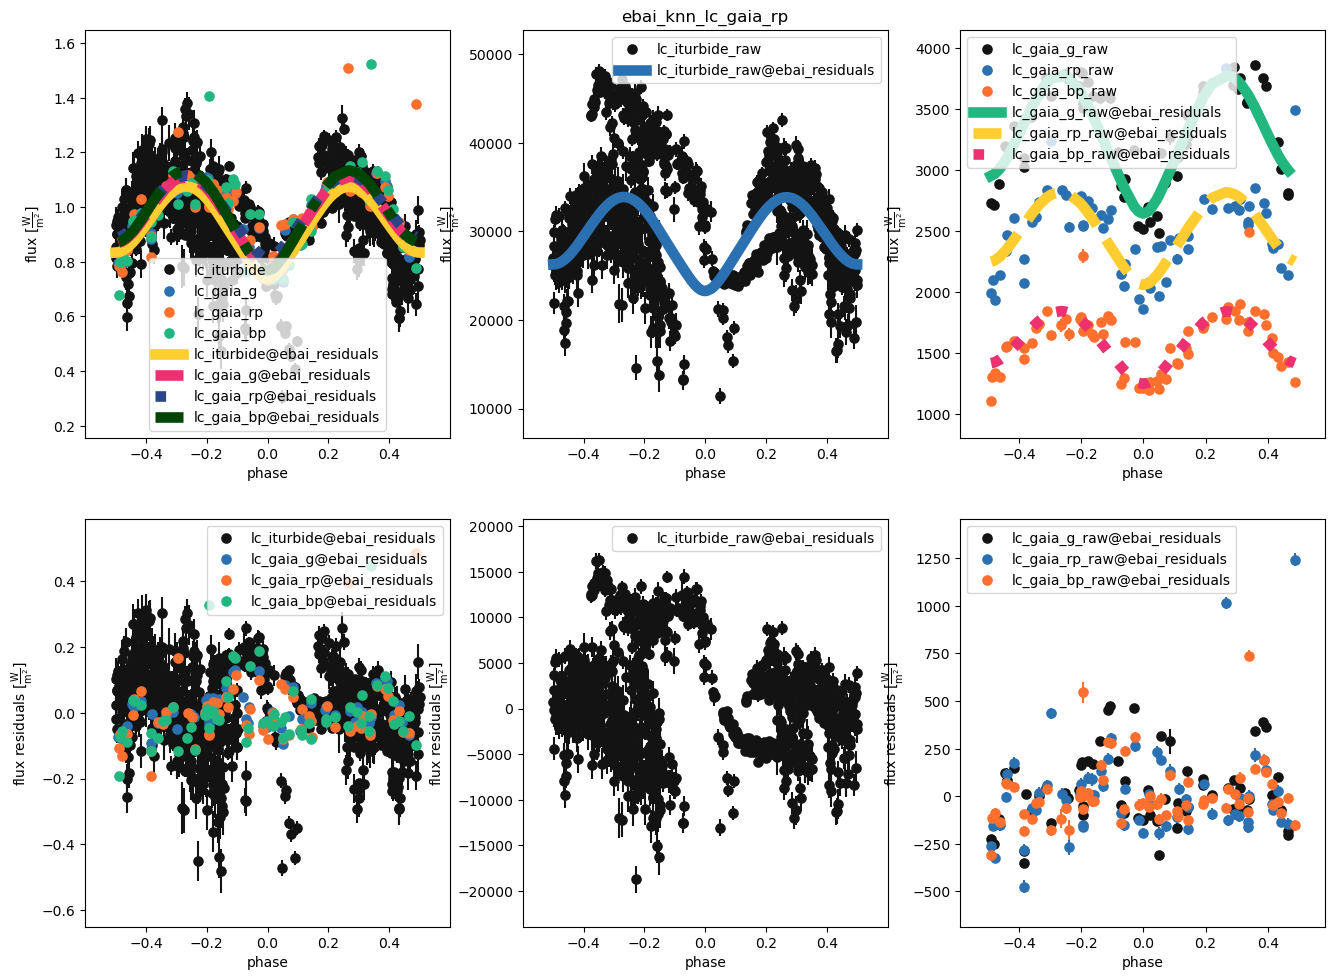

ebai_knn_lc_gaia_bp_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.93 
incl@binary@orbit@component = 1.22 rad
fillout_factor@contact_envelope@envelope@component = 0.75 
q@binary@orbit@component = 1.12 


100%|██████████| 1284/1284 [01:33<00:00, 13.73it/s]
Tue, 15 Aug 2023 15:20 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:20 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:20 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide 32.047370131679614 W / m2
	 lc_iturbide_raw 1555145.909171421 W / m2
	 lc_gaia_g 0.8053374795119124 W / m2
	 lc_gaia_rp 0.8474408061956182 W / m2
	 lc_gaia_bp 0.8048961527818947 W / m2
	 lc_gaia_g_raw 1243.111638342371 W / m2
	 lc_gaia_rp_raw 2163.946706180379 W / m2
	 lc_gaia_bp_raw 1171.4528738249276 W / m2


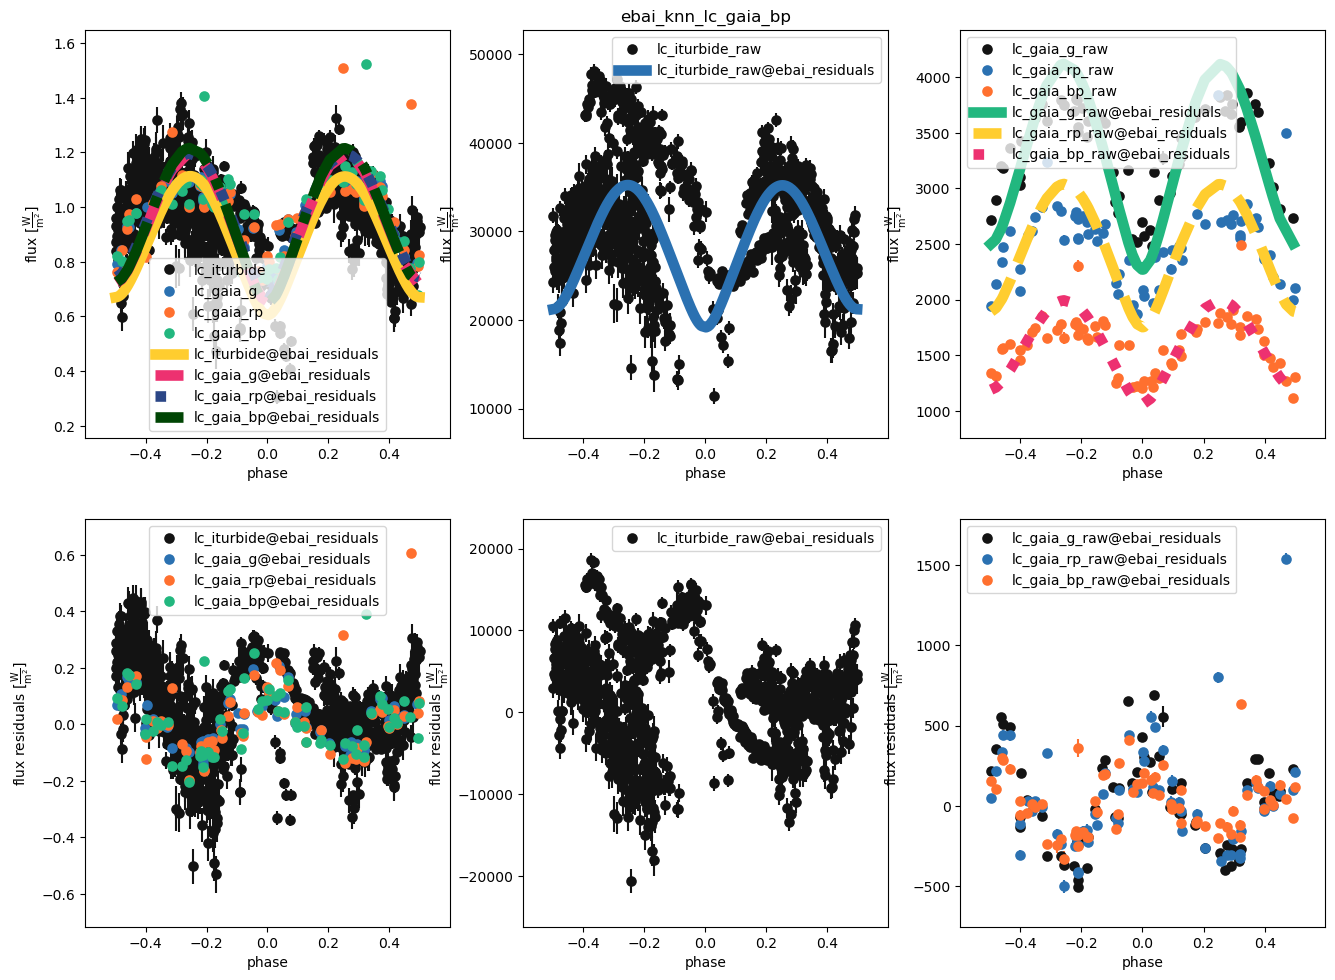

ebai_knn_gaia_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.85 
incl@binary@orbit@component = 1.01 rad
fillout_factor@contact_envelope@envelope@component = 0.76 
q@binary@orbit@component = 2.15 


100%|██████████| 1284/1284 [01:34<00:00, 13.53it/s]
Tue, 15 Aug 2023 15:22 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:22 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:22 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide -6.796926841410038 W / m2
	 lc_iturbide_raw 149677.89917071827 W / m2
	 lc_gaia_g 0.2242683070270587 W / m2
	 lc_gaia_rp 0.23019989076340863 W / m2
	 lc_gaia_bp 0.1259343722712063 W / m2
	 lc_gaia_g_raw 1491.763820349755 W / m2
	 lc_gaia_rp_raw 1526.7725336577328 W / m2
	 lc_gaia_bp_raw 825.444061721015 W / m2


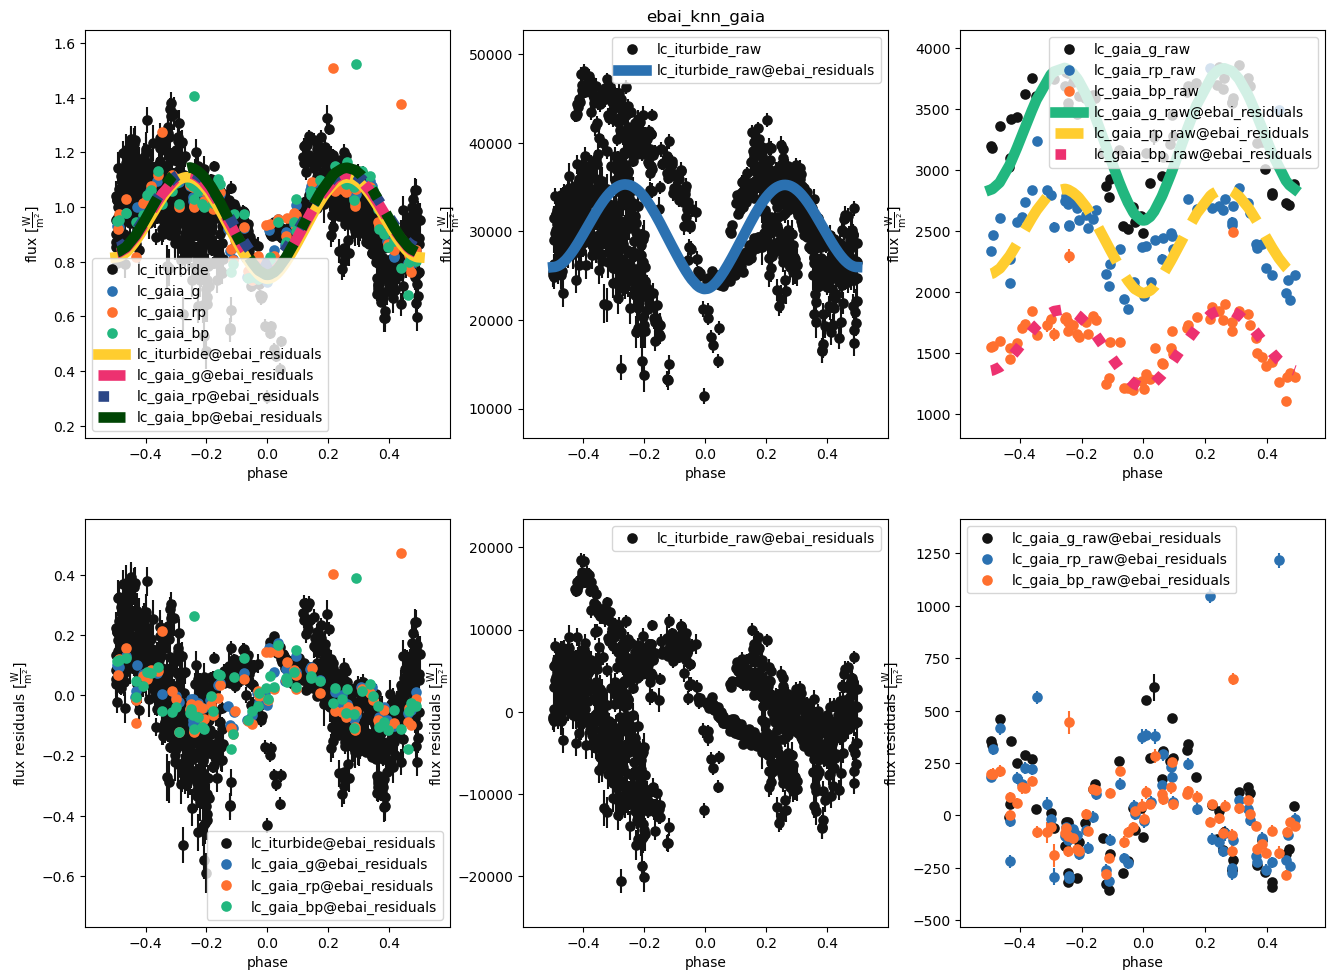

ebai_knn_lc_gaia_g_raw_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.93 
incl@binary@orbit@component = 1.47 rad
fillout_factor@contact_envelope@envelope@component = 0.46 
q@binary@orbit@component = 7.74 


100%|██████████| 1284/1284 [01:15<00:00, 17.11it/s]
Tue, 15 Aug 2023 15:23 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:23 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:23 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide 2.9679734929086523 W / m2
	 lc_iturbide_raw 508979.24703312677 W / m2
	 lc_gaia_g 0.21995367651461406 W / m2
	 lc_gaia_rp 0.2510778982667283 W / m2
	 lc_gaia_bp 0.12104695349364958 W / m2
	 lc_gaia_g_raw 1359.9957217645474 W / m2
	 lc_gaia_rp_raw 1566.2170420417256 W / m2
	 lc_gaia_bp_raw 824.5777843857927 W / m2


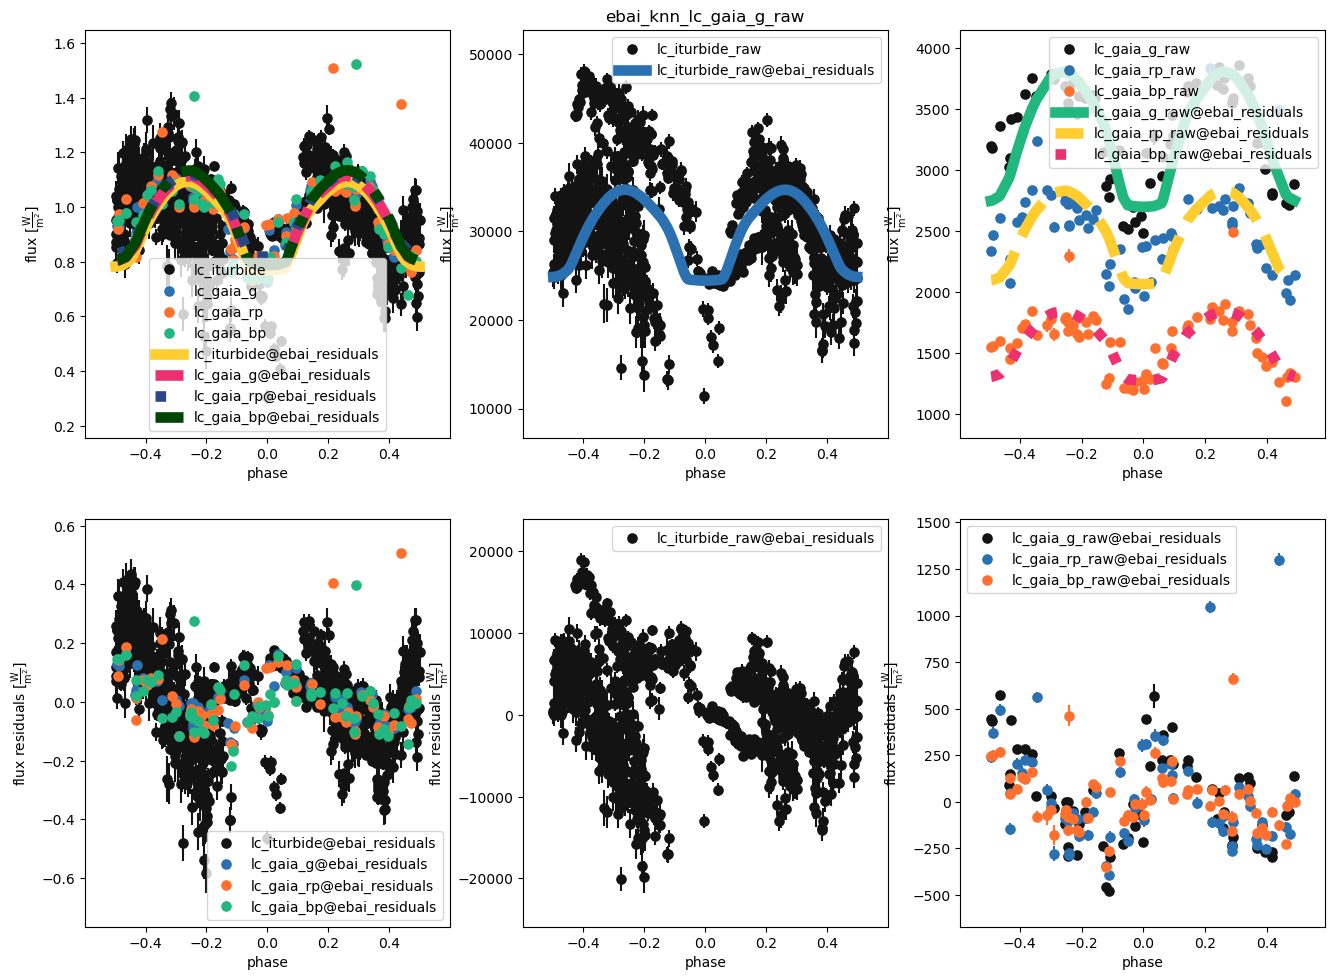

ebai_knn_lc_gaia_rp_raw_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.83 
incl@binary@orbit@component = 1.03 rad
fillout_factor@contact_envelope@envelope@component = 0.77 
q@binary@orbit@component = 3.71 


100%|██████████| 1284/1284 [01:24<00:00, 15.17it/s]
Tue, 15 Aug 2023 15:25 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:25 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:25 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide 10.676355146714453 W / m2
	 lc_iturbide_raw 1031973.2239480442 W / m2
	 lc_gaia_g 0.039170303998722344 W / m2
	 lc_gaia_rp 0.042480168436114574 W / m2
	 lc_gaia_bp 0.012562117075897827 W / m2
	 lc_gaia_g_raw 1575.4958568284678 W / m2
	 lc_gaia_rp_raw 785.4685863383727 W / m2
	 lc_gaia_bp_raw 441.38582357264613 W / m2


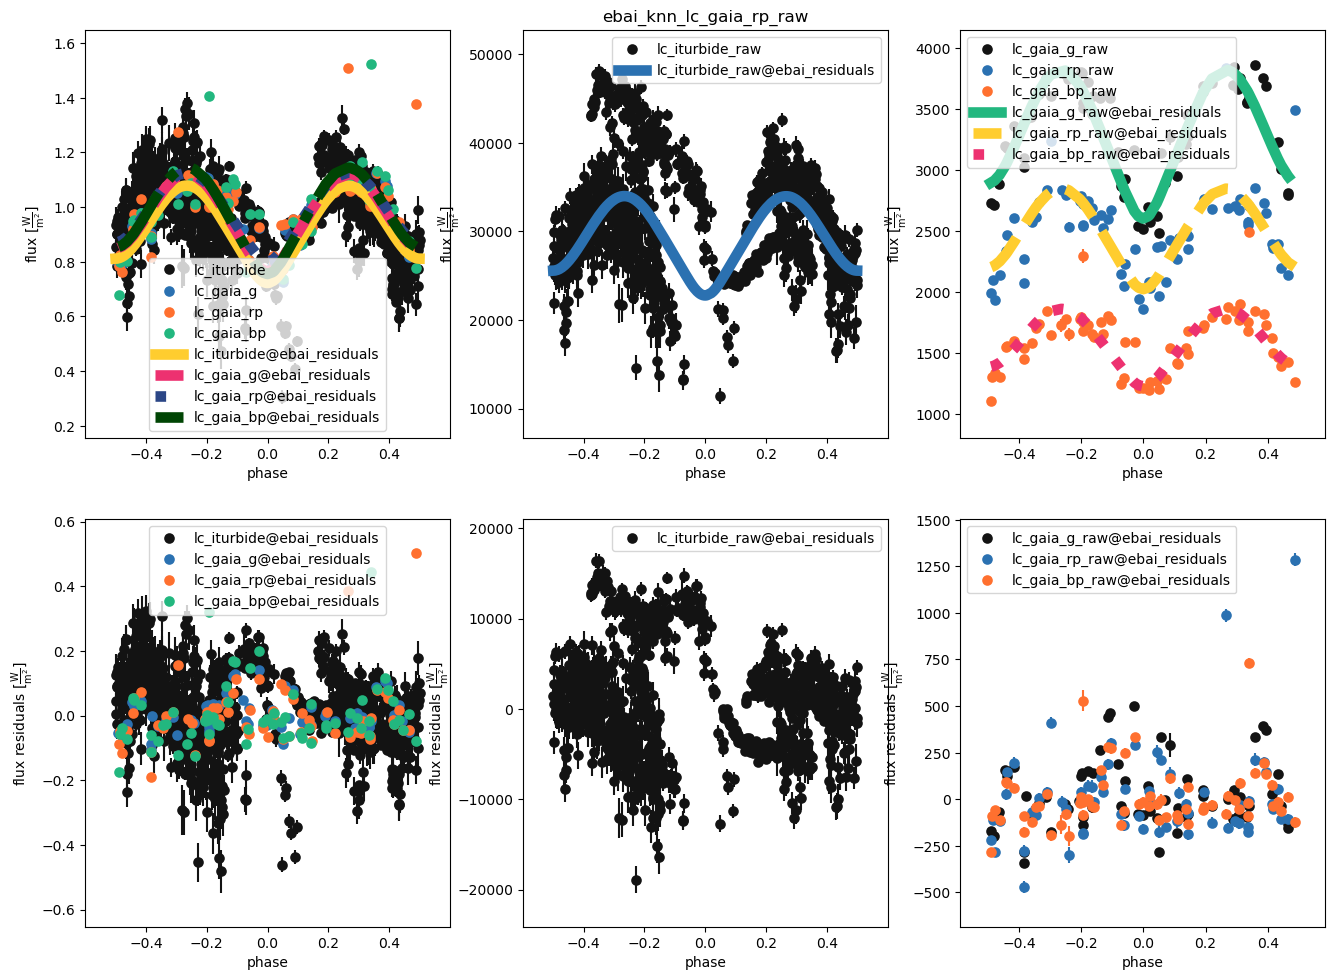

ebai_knn_lc_gaia_bp_raw_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.08 rad
fillout_factor@contact_envelope@envelope@component = 0.85 
q@binary@orbit@component = 1.26 


100%|██████████| 1284/1284 [01:31<00:00, 14.01it/s]
Tue, 15 Aug 2023 15:27 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:27 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:27 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide 21.76517746002429 W / m2
	 lc_iturbide_raw 1257080.8502860146 W / m2
	 lc_gaia_g 0.37588670867449936 W / m2
	 lc_gaia_rp 0.4002460559333719 W / m2
	 lc_gaia_bp 0.3364882236225961 W / m2
	 lc_gaia_g_raw 754.168498335177 W / m2
	 lc_gaia_rp_raw 1366.3723152085063 W / m2
	 lc_gaia_bp_raw 657.5806582150808 W / m2


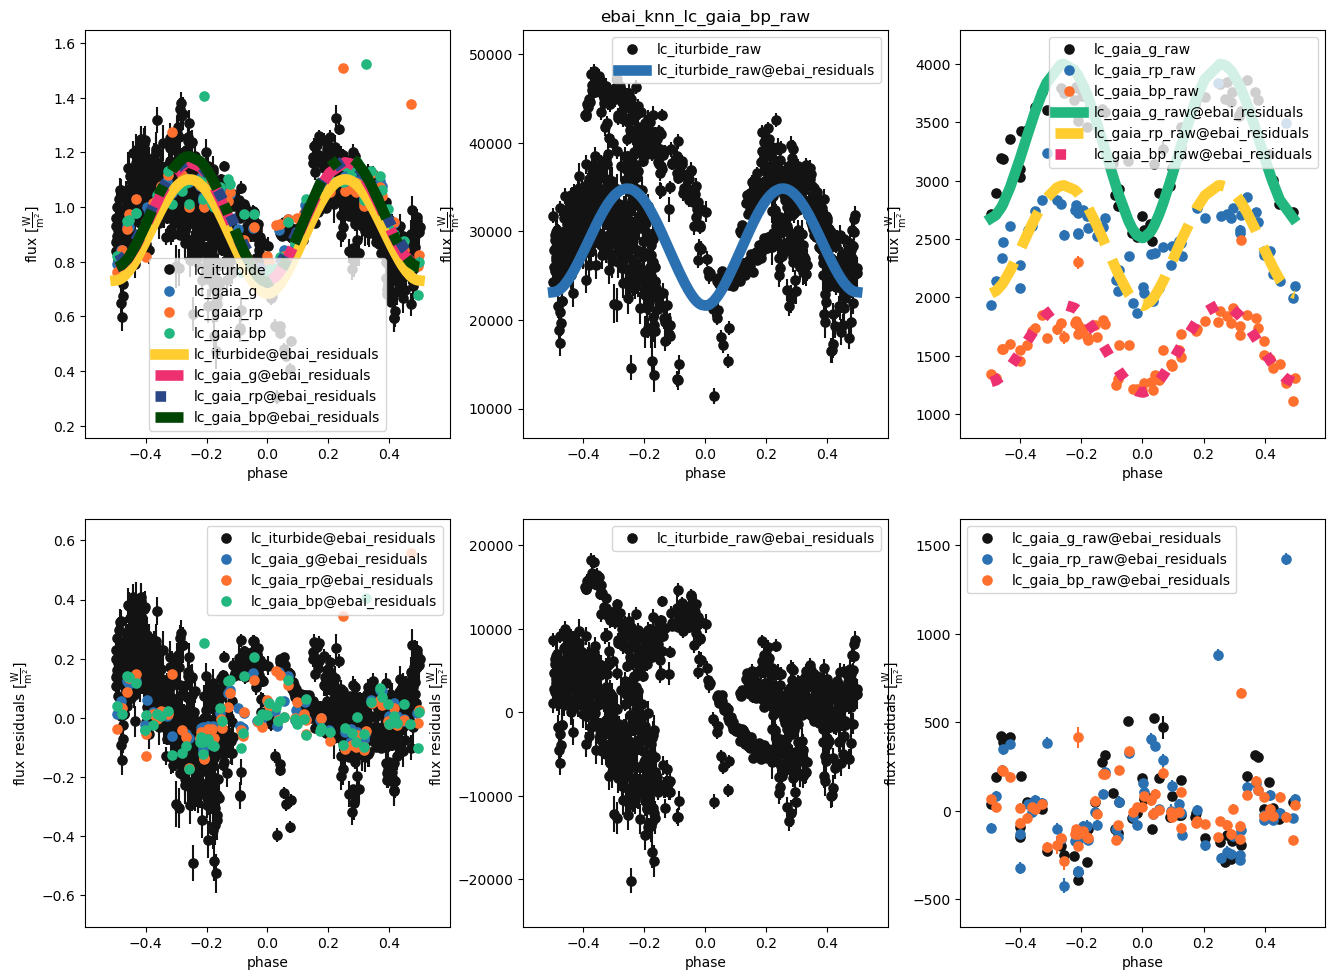

ebai_knn_raw_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.89 
incl@binary@orbit@component = 1.49 rad
fillout_factor@contact_envelope@envelope@component = 0.77 
q@binary@orbit@component = 9.72 


100%|██████████| 1284/1284 [01:16<00:00, 16.73it/s]
Tue, 15 Aug 2023 15:28 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:28 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:28 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide 1.7400225588383371 W / m2
	 lc_iturbide_raw 442634.07114830683 W / m2
	 lc_gaia_g 0.2532308357711086 W / m2
	 lc_gaia_rp 0.2502249358400144 W / m2
	 lc_gaia_bp 0.18596965223188933 W / m2
	 lc_gaia_g_raw 1215.1490681953483 W / m2
	 lc_gaia_rp_raw 1526.5065791211368 W / m2
	 lc_gaia_bp_raw 871.4261924481762 W / m2


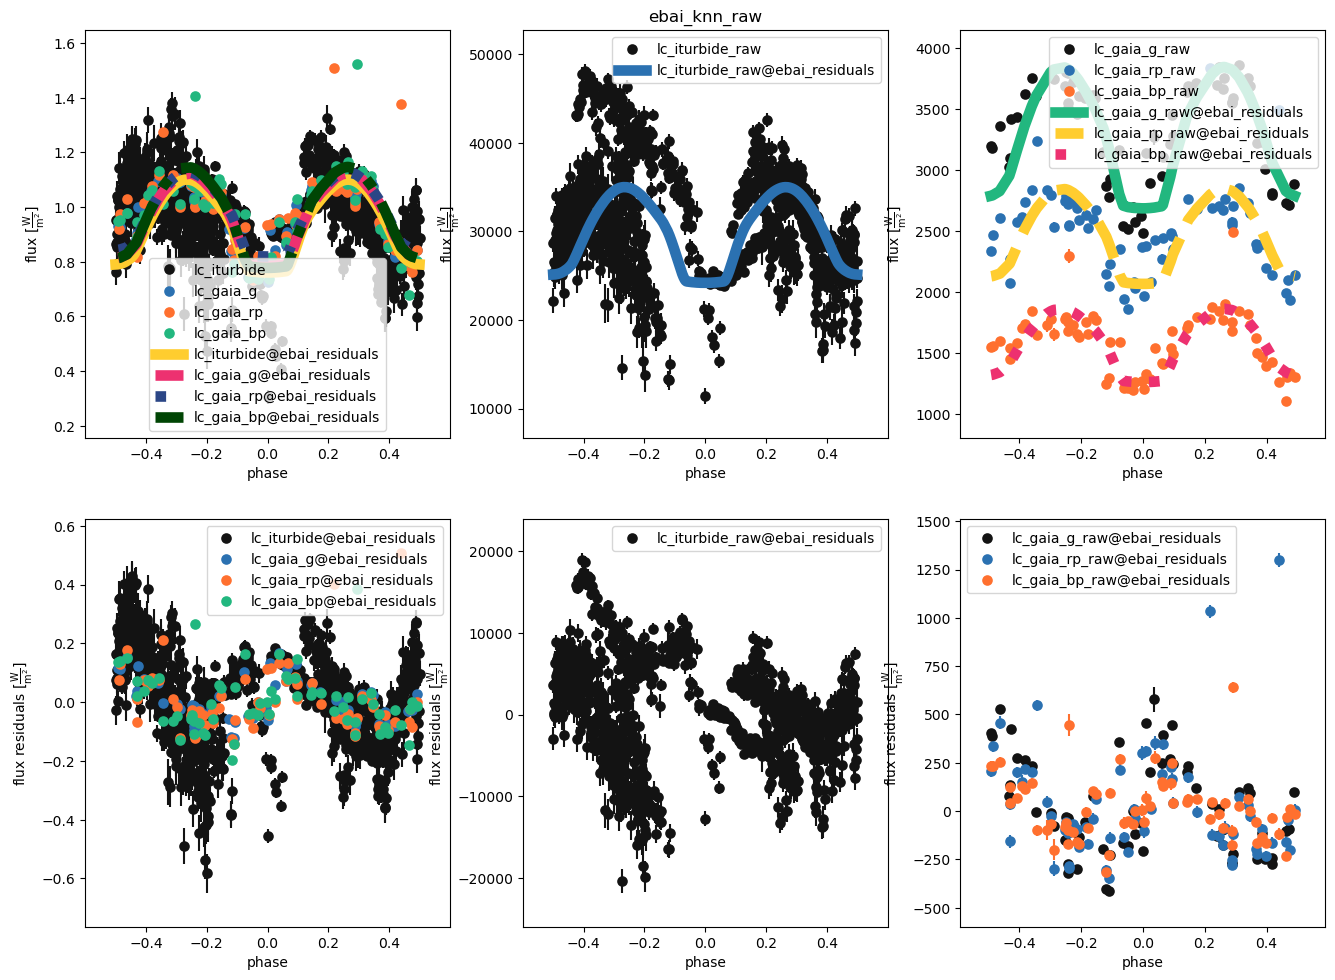

ebai_knn_raw_gaia_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.46 rad
fillout_factor@contact_envelope@envelope@component = 0.56 
q@binary@orbit@component = 9.42 


100%|██████████| 1284/1284 [01:20<00:00, 15.96it/s]
Tue, 15 Aug 2023 15:30 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009667118746194401 for dataset='lc_gaia_g'
Tue, 15 Aug 2023 15:30 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009848743338464008 for dataset='lc_gaia_rp'
Tue, 15 Aug 2023 15:30 BUNDLE       WARNING dataset-scaling: adopting sigmas=0.0009776638789814802 for dataset='lc_gaia_bp'


Total residuals
	 lc_iturbide -0.29437314266689185 W / m2
	 lc_iturbide_raw 405305.65650815365 W / m2
	 lc_gaia_g 0.16953292739931014 W / m2
	 lc_gaia_rp 0.18810313330504236 W / m2
	 lc_gaia_bp 0.0797091415038188 W / m2
	 lc_gaia_g_raw 1329.4566140506154 W / m2
	 lc_gaia_rp_raw 1458.5386212266699 W / m2
	 lc_gaia_bp_raw 800.4209411880986 W / m2


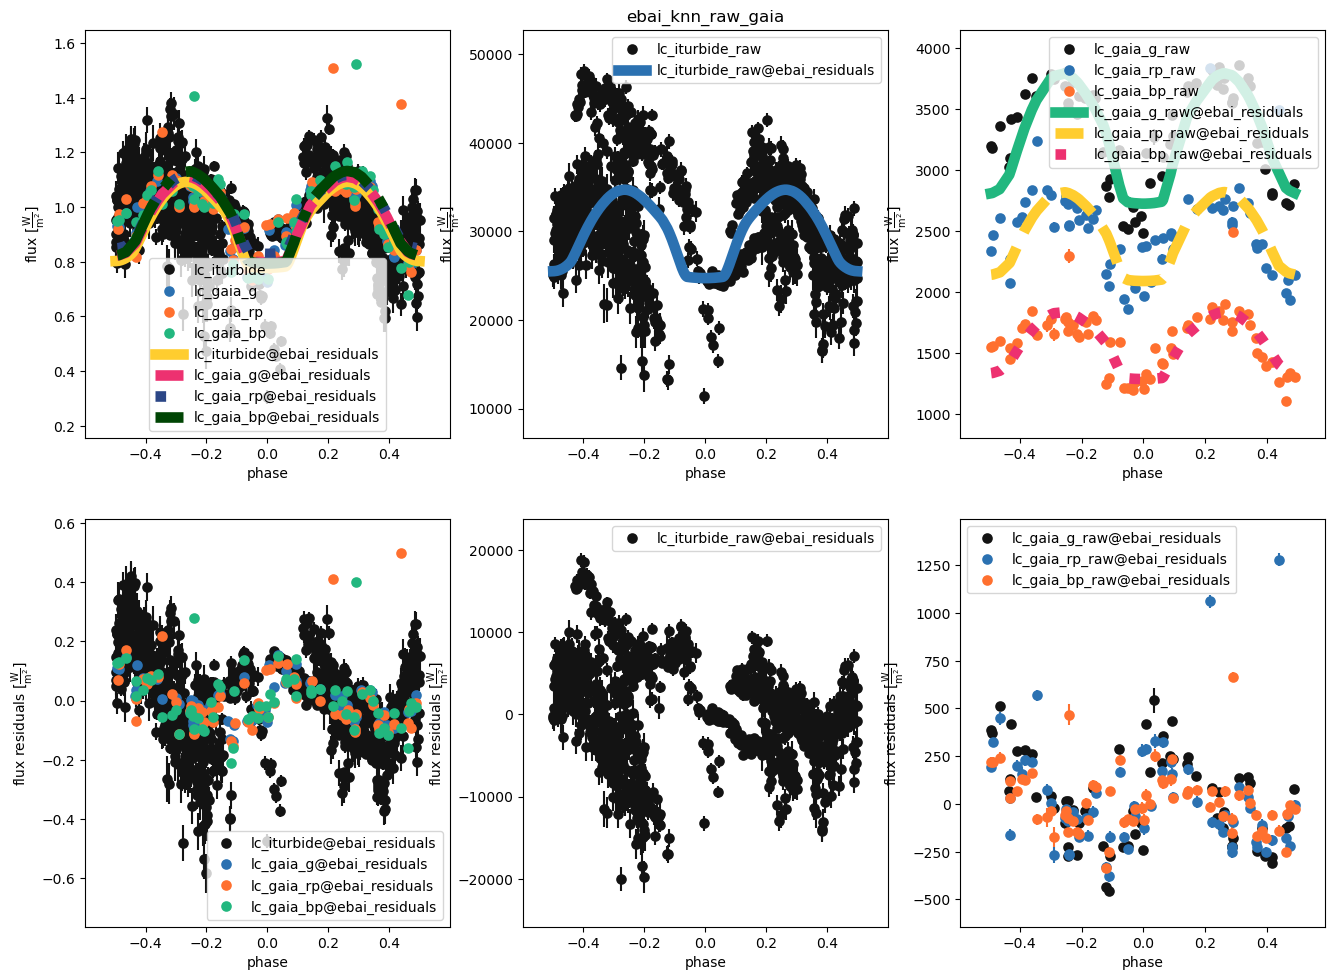

In [67]:
# take all of the estimator solutions one by one and check for best fit
	# maybe use chi2 measure?
	# definitely plot residuals
for solver in [s for s in b.solvers if 'ebai_knn' in s]:
    solution = f'{solver}_solution'

    # skipping any failed solvers
    if solution not in b.solutions:
        continue
    print(solution)
    print("-------------------------------")
    gen_utils.printFittedVals(b, solution)

    # TODO: save each of these in its own separate model
    b.adopt_solution(solution=solution)
    b.run_compute(model='ebai_residuals', compute='phoebe01', overwrite=True)

    print("Total residuals")
    for d in b.datasets:
        if d == 'mesh01':
            continue
        print("\t", d, np.sum(b.calculate_residuals(model='ebai_residuals', dataset=d)))

    b.plot(x='phase', model='ebai_residuals', dataset=normalizedDatasets, kind='lc', legend=True, marker={'dataset': '.'}, s={'dataset': 0.01}, axorder=1)
    b.plot(x='phase', model='ebai_residuals', dataset=['lc_iturbide_raw'], kind='lc', legend=True, marker={'dataset': '.'}, s={'dataset': 0.01}, title=solver, axorder=2)
    b.plot(x='phase', model='ebai_residuals', dataset=rawGaiaDatasets, kind='lc', legend=True, marker={'dataset': '.'}, s={'dataset': 0.01}, axorder=3)

    b.plot(x='phase', y='residuals', model='ebai_residuals', dataset=normalizedDatasets, kind='lc', legend=True, marker='.', s=0.01, axorder=4)
    b.plot(x='phase', y='residuals', model='ebai_residuals', dataset=['lc_iturbide_raw'], kind='lc', legend=True, marker='.', s=0.01, axorder=5)
    b.plot(x='phase', y='residuals', model='ebai_residuals', dataset=rawGaiaDatasets, kind='lc', legend=True, show=True, marker='.', s=0.01, draw_title=True, axorder=6, subplot_grid=(3,3))

### Checking meshes

In [68]:
b.set_value_all(qualifier='enabled', value=False)
b.set_value_all(qualifier='enabled', dataset='mesh01', value=True)

for solver in [s for s in b.solvers if 'ebai_knn' in s]:
	solution = f'{solver}_solution'

	# skipping any failed solvers
	if solution not in b.solutions:
		continue
	print(solution)
	print("-------------------------------")
	gen_utils.printFittedVals(b, solution)

	b.adopt_solution(solution=solution)
	b.run_compute(model='ebai_residuals', compute='phoebe01', overwrite=True)
	
	gen_utils.animateMesh(b, logger, draw_title=True, title=solution)

ebai_knn_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.47 rad
fillout_factor@contact_envelope@envelope@component = 0.77 
q@binary@orbit@component = 9.51 


100%|██████████| 16/16 [00:00<00:00, 21.72it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_lc_iturbide_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.87 
incl@binary@orbit@component = 0.92 rad
fillout_factor@contact_envelope@envelope@component = 0.62 
q@binary@orbit@component = 0.89 


100%|██████████| 16/16 [00:01<00:00, 11.45it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_lc_gaia_g_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.43 rad
fillout_factor@contact_envelope@envelope@component = 0.42 
q@binary@orbit@component = 9.74 


100%|██████████| 16/16 [00:01<00:00, 14.36it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_lc_gaia_rp_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.81 
incl@binary@orbit@component = 0.99 rad
fillout_factor@contact_envelope@envelope@component = 0.78 
q@binary@orbit@component = 4.24 


100%|██████████| 16/16 [00:00<00:00, 18.08it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_lc_gaia_bp_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.93 
incl@binary@orbit@component = 1.22 rad
fillout_factor@contact_envelope@envelope@component = 0.75 
q@binary@orbit@component = 1.12 


100%|██████████| 16/16 [00:01<00:00, 15.42it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_gaia_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.85 
incl@binary@orbit@component = 1.01 rad
fillout_factor@contact_envelope@envelope@component = 0.76 
q@binary@orbit@component = 2.15 


100%|██████████| 16/16 [00:01<00:00, 13.96it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_lc_gaia_g_raw_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.93 
incl@binary@orbit@component = 1.47 rad
fillout_factor@contact_envelope@envelope@component = 0.46 
q@binary@orbit@component = 7.74 


100%|██████████| 16/16 [00:00<00:00, 18.66it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_lc_gaia_rp_raw_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.83 
incl@binary@orbit@component = 1.03 rad
fillout_factor@contact_envelope@envelope@component = 0.77 
q@binary@orbit@component = 3.71 


100%|██████████| 16/16 [00:01<00:00, 13.61it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_lc_gaia_bp_raw_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.07 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.08 rad
fillout_factor@contact_envelope@envelope@component = 0.85 
q@binary@orbit@component = 1.26 


100%|██████████| 16/16 [00:01<00:00, 13.70it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_raw_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.89 
incl@binary@orbit@component = 1.49 rad
fillout_factor@contact_envelope@envelope@component = 0.77 
q@binary@orbit@component = 9.72 


100%|██████████| 16/16 [00:00<00:00, 18.34it/s]


<Figure size 800x600 with 0 Axes>

ebai_knn_raw_gaia_solution
-------------------------------
t0_supconj@binary@orbit@component = -0.06 d
teffratio@binary@orbit@component = 0.91 
incl@binary@orbit@component = 1.46 rad
fillout_factor@contact_envelope@envelope@component = 0.56 
q@binary@orbit@component = 9.42 


100%|██████████| 16/16 [00:00<00:00, 18.92it/s]


<Figure size 800x600 with 0 Axes>

## Save estimator bundle

In [69]:
# b.save("./bundle-saves/ebai-estimates")
b.save("./bundle-saves/ebai-solver-runs-no-estimates")

'./bundle-saves/ebai-solver-runs-no-estimates'